# Introduction to Neural Networks
## Professor Bradley Warner
## October 21, 2019

In this lesson we will give a brief introduction to neural networks. The lesson plan is
1. Brief history of neural networks
2. Build a logistic regression neural network and then expand with hidden layers
3. Deep learning and example
4. Resources to learn about neural networks on your own

Documentation: This works is based on materials from Datacamp, Coursera, and the Hands-On Machine Learning book.

## 1. Introduction to Neural Networks

Andrew Ng is an important researcher and educator in the field of machine learning and artificial intelligence. He was a founder of Coursera and currently has an on line series of courses at [deeplearning.ai](https://www.deeplearning.ai/). Let's let Andrew introduce neural networks.

In [1]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="./NN.mp4" type="video/mp4">
</video></div>

The history of neural networks is long and interesting. I find it interesting how many times it was decided that these types of models had reached their useful limit only to have them come back into prominence later. 

In the 1950s, researchers were interested in a mathematical model of the biological functioning of the brain. They were curious how simple "on/off" switches called neurons could lead to such complex reasoning. Eventually, neural networks ceased to be a model of the brain and became powerful mathematical models for supervised and unsupervised learning. The basic building block is a neuron. In the figure below, we see the physical neuron and its mathematical equivalent. The neuron takes a weighted sum of inputs from the previous layers, applies a transformation to the sum and outputs to the next layer. A basic neural network is a series of layers containing neurons.

![Neural Network Model](content_content_neuron.png) 

Let's build our first network and relate it to a known statistical model, regression.

## 2 Simple Neural Network - Logistic Regression 

First we will load all our python packages. We are using scikit-learn for traditional models and keras for neural networks. Keras is a wrapper for either tensorflow, from Google, or theano. Both are powerful neural network platforms, keras makes it easier to interface with them.

In [2]:
import pickle
from pathlib import Path
from skimage import io

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression

# import keras library
import keras

# import Sequential from the keras models module
from keras.models import Sequential

# import Dense, Dropout, Flatten, Conv2D, MaxPooling2D from the keras layers module
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# import seaborn for graphics
import seaborn as sns 

# import random numbers
import random

# import math
import math

Using TensorFlow backend.


### Logistic Regression 

We will start will a simple artifical example. This example allows us to compare neural networks with traditional regression and see that with no hidden layers they are the same. The key selection is the fitting criteria, error function, and activation function. We will use sigmoidal activation function with a binary cross entropy fitting criteria. This is equivalent to logistic regression from the generalized linear model framework.

#### Generate simple data
We will use two-dimensional data to make it easier to visual. This data set will be difficult for logistic regression since there is no linear decision boundary.

In [3]:
# Make data
np.random.seed(42)
X,y=make_circles(n_samples=200, shuffle=True, random_state=41,noise=.07,factor=0.5)

In [4]:
# Convert to dataframe for ease of use in visualizing
d1=pd.DataFrame(X,columns=['x','y'])
d1.head()

x         y
0  0.949622 -0.257710
1 -0.755823 -0.863226
2 -0.239696 -0.337869
3  0.379041 -0.125144
4 -0.372564 -0.870204

In [5]:
d1['Result']=y

In [6]:
d1.head()

x         y  Result
0  0.949622 -0.257710       0
1 -0.755823 -0.863226       0
2 -0.239696 -0.337869       1
3  0.379041 -0.125144       1
4 -0.372564 -0.870204       0

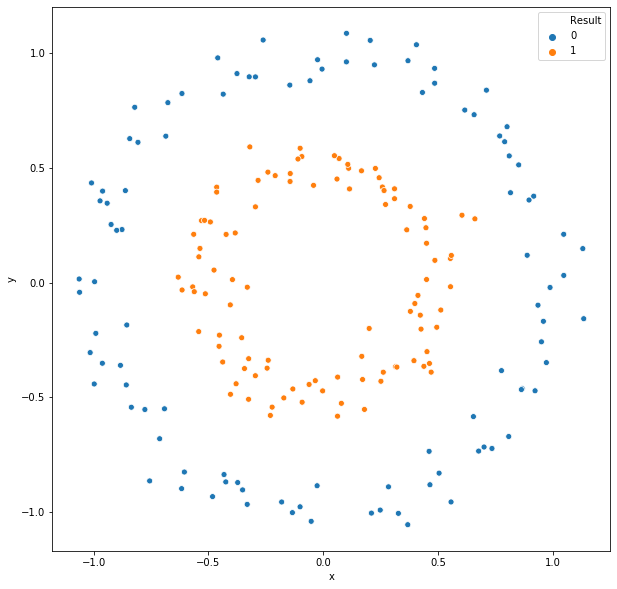

In [7]:
# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot('x','y',hue='Result',data=d1,ax=ax)

#### Logistic Regression 
Let's run a logistic regression model. Remember logistic regression is fitting the model
$$p={1 \over 1+e^{-\beta_0+\beta_1x_1+\beta_2x_2}}$$

In [8]:
logmodel=LogisticRegression(penalty='none',solver='newton-cg')

In [9]:
logmodel.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
preds=logmodel.predict(X)

In [11]:
print(classification_report(y,preds))

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       100
           1       0.51      0.52      0.52       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200



In [12]:
logmodel.coef_

array([[-0.04331683,  0.02384417]])

In [13]:
logmodel.intercept_

array([-0.0002792])

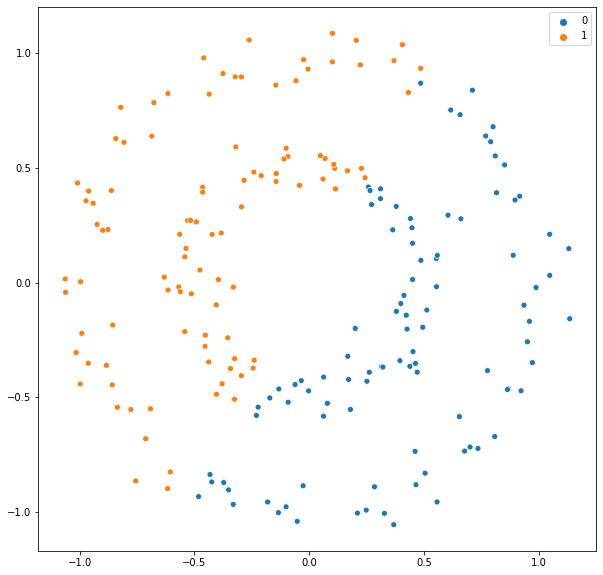

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=preds,ax=ax)

#### Simple Neural Network Logistic Regression 

We will repeat with a simple logistic regression model built as a neural network.

![Neural Network as Logistic Regression Model](NN_Logistic.png) 

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

The cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

The weights are found by the method of gradient decent called backprogation, see the [link](https://www.youtube.com/watch?v=FaHHWdsIYQg) for a video explanation. It uses partial derivatives and is in practice clever because it uses an idea called auto differentiation. 

In [16]:
# Create a sequential model
nnmodel = Sequential()

# Add a dense layer 
nnmodel.add(Dense(1, input_shape=(2,), activation='sigmoid'))

# Compile your model
nnmodel.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
nnmodel.summary()

W1019 19:21:50.330760 10548 deprecation_wrapper.py:119] From C:\Users\Brad.Warner\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1019 19:21:50.858620 10548 deprecation_wrapper.py:119] From C:\Users\Brad.Warner\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1019 19:21:50.948818 10548 deprecation_wrapper.py:119] From C:\Users\Brad.Warner\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1019 19:21:51.027801 10548 deprecation_wrapper.py:119] From C:\Users\Brad.Warner\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Train your model for 200 epochs
np.random.seed(20)
nnmodel.fit(X, y, epochs=200,verbose=False)

In [25]:
nnmodel.get_weights()

[array([[-0.04897264],
        [ 0.02475125]], dtype=float32), array([-0.00264457], dtype=float32)]

In [26]:
nnpreds=nnmodel.predict_classes(X).flatten()

In [27]:
print(classification_report(y,nnpreds))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       100
           1       0.52      0.50      0.51       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200



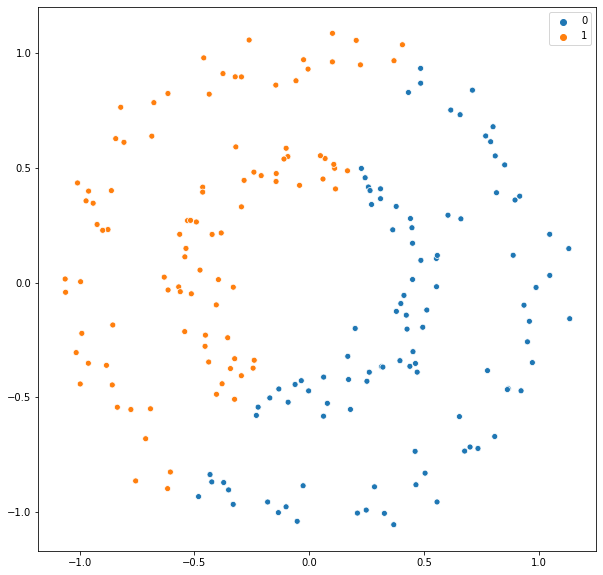

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=nnpreds,ax=ax)

#### More Complex Neural Network

Let's improve logistic regression by adding hidden layers and see what happens to predictions. Below in the figure is an example of a neural network with one hidden layer. We will build a more complex neural network. In fact it is a deep neural network since it has more than 2 hidden layers.

<img src="classification_kiank.png" style="width:600px;height:300px;">


In [29]:
# Instantiate a sequential model
nnmodel2 = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
nnmodel2.add(Dense(128, input_shape=(2,), activation='relu'))
nnmodel2.add(Dense(64, activation='relu'))
nnmodel2.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
nnmodel2.add(Dense(1,activation='sigmoid'))

# Compile your model
nnmodel2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display a summary of your model
nnmodel2.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 10,753
Trainable params: 10,753
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Train your model for 200 epochs
np.random.seed(20)
nnmodel2.fit(X, y, epochs=200,verbose=False)

In [31]:
nnpreds2=nnmodel2.predict_classes(X).flatten()

In [32]:
print(classification_report(y,nnpreds2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



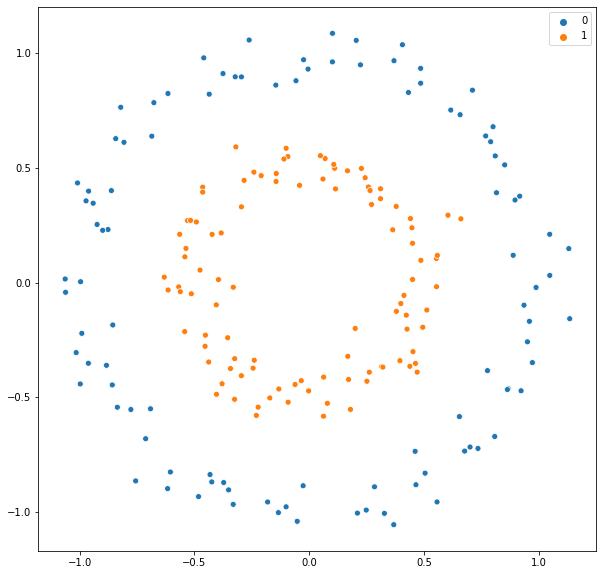

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=nnpreds2,ax=ax)

#### Summary

This problem could have easily been solved by logistic regression using feature engineering. If we create a new variable that is the sum of the square values of the x and y coordinates we would also get perfect prediction. The neural network figured this out for us and in higher dimensions, feature engineering is more difficult.

Note that we can easily generalize this model to more that two classes as well as individual data points with multiple labels. It is easy to adjust the models by simply increasing the number of outputs; we also have to change the loss function.

We have glossed over many considerations such as:

1) How do we prevent overfitting?  
2) How do we prevent local minimum?  
3) How do we select the size of the model?  
4) How do we speed up learning rates?  
5) How to reduce vanishing gradients?

Neural network models peaked in popularity in the late 1990 and early 2000s because of some of these issues and also because models such as support vector machines and random forests gained in popularity. It was not until almost a decade into the new century that deep learning generated new excitement about neural networks. We will briefly explore these topics next. Andrew will introduce deep learning models for us.

## 4. Deep Learning

Let's have Andrew introduce the resurgence of neural network with deep learning models.

In [34]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="./Deep_Models.mp4" type="video/mp4">
</video></div>

## Convolution Neural Network

Convolution neural networks are extremely deep models that use many layers. The convolution portion of the model is a smoothing process that scans across an image to find features. These models are too complicated to describe here. If you want to learn more you can read this tutorial from [datacamp](https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python). You can also watch the video below from data camp.

In [35]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="./Intro_CNN.mp4" type="video/mp4">
</video></div>

Since these models are large and require a great deal of data, we will import a trained model into our notebook. The ResNet50 model 50 layers and can distinquish between 1000 different outputs. Let's import it and try it on some of my own photos. You can also experiment with it on line at this [link](https://tensorspace.org/html/playground/resnet50.html)

<img src="Resnet.png">

#### Import model from Keras

In [36]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

#### My dog Molly

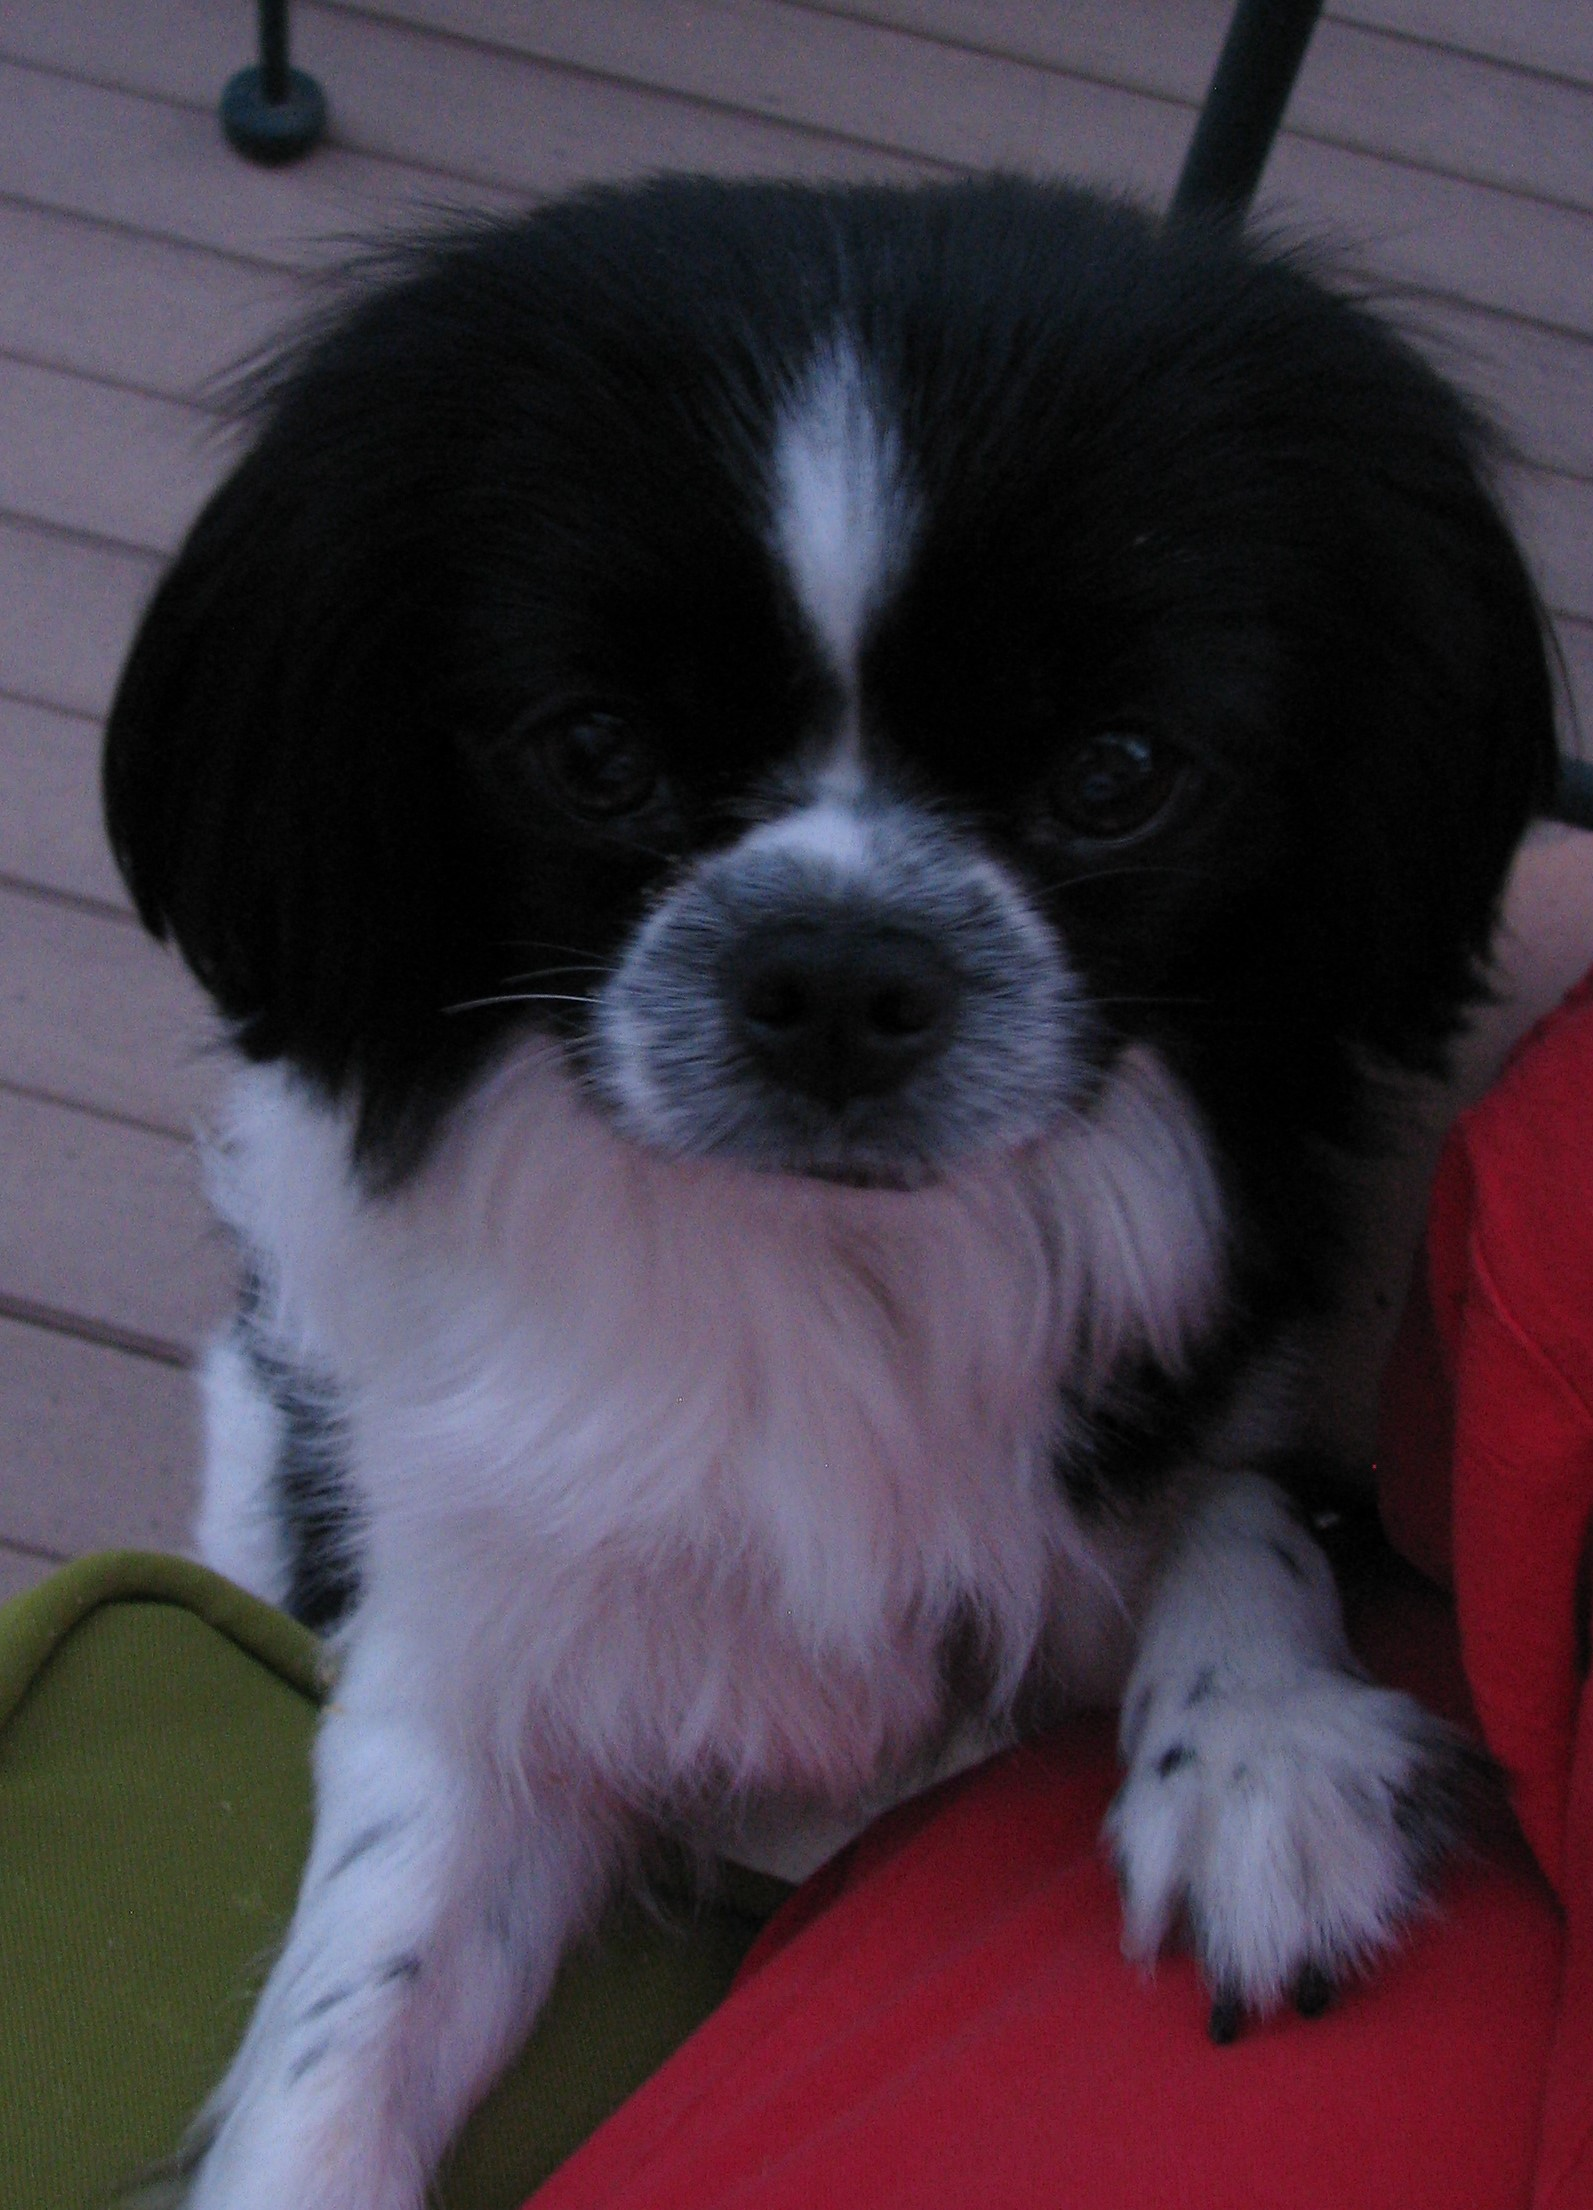

In [37]:
from IPython.display import display, Image
display(Image(filename='Molly.jpg',width=512,height=512))

In [38]:
img_path = 'Molly.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [39]:
model = ResNet50(weights='imagenet')

W1019 20:14:52.482416 10548 deprecation_wrapper.py:119] From C:\Users\Brad.Warner\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W1019 20:14:52.689155 10548 deprecation_wrapper.py:119] From C:\Users\Brad.Warner\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [40]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02086079', 'Pekinese', 0.44138685), ('n02085782', 'Japanese_spaniel', 0.4025225), ('n02086240', 'Shih-Tzu', 0.13401924)]


Molly is a Japanese Chin, Japanese Spaniel

#### Second Example

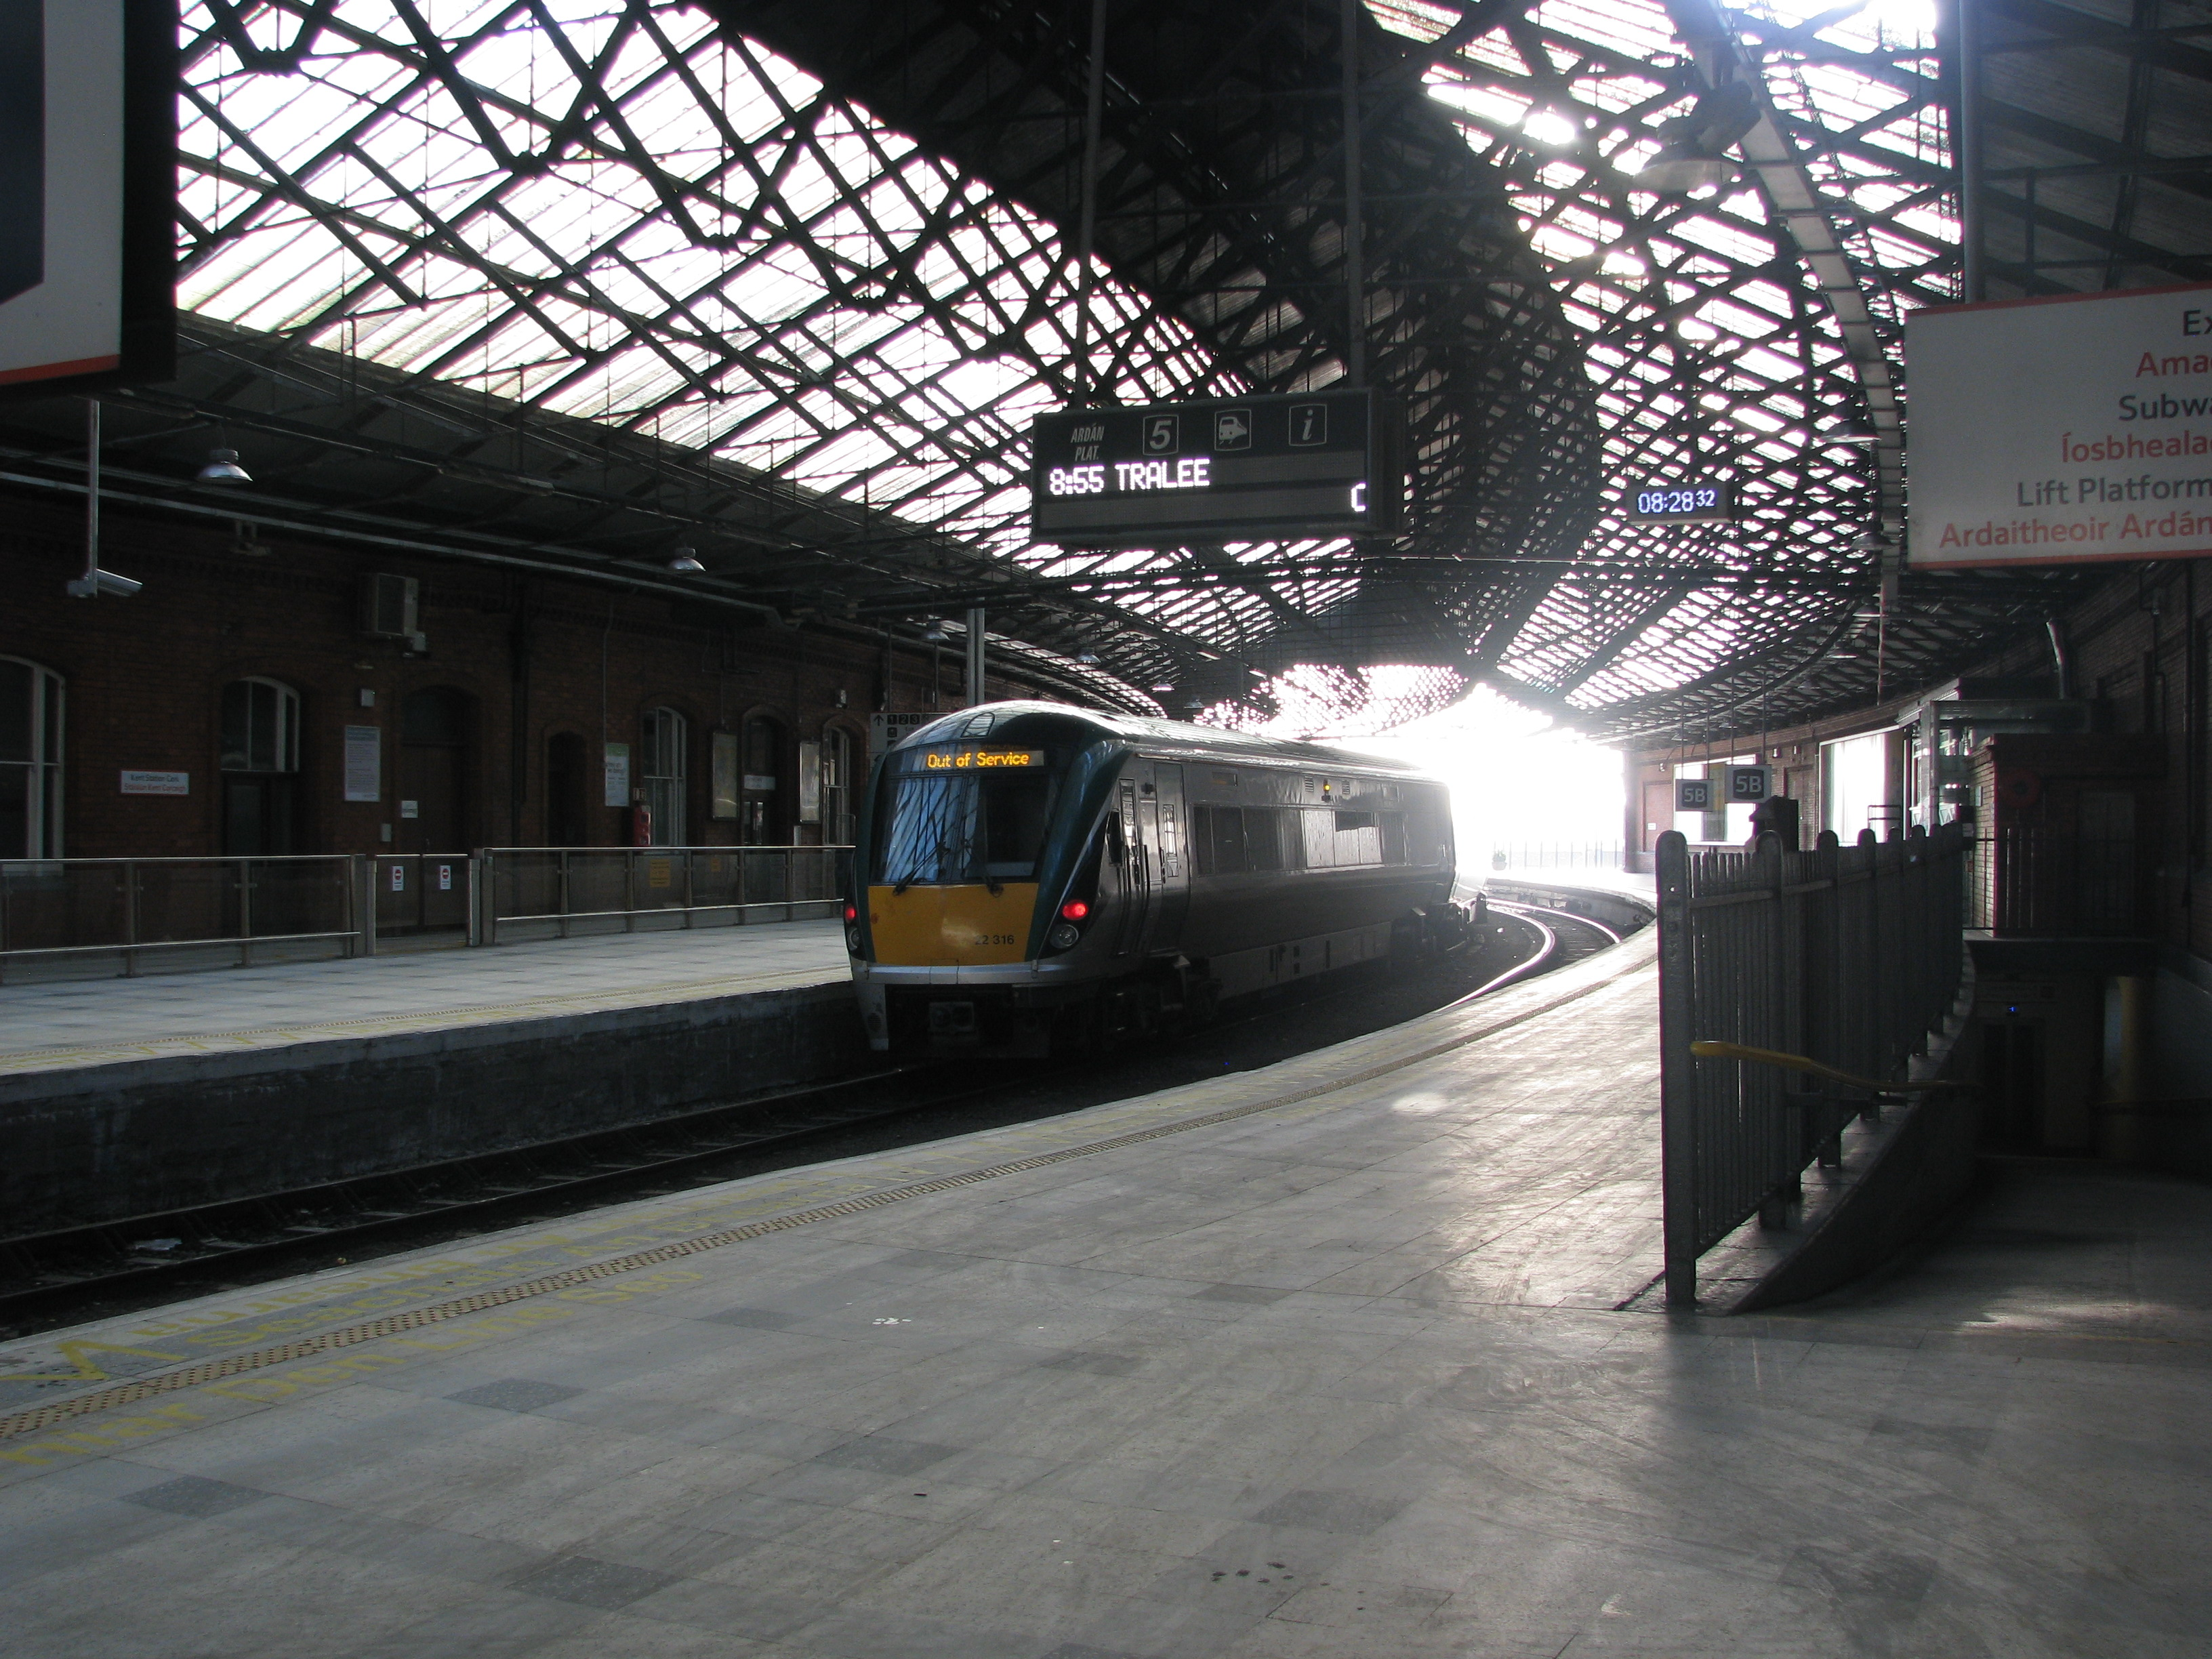

In [41]:
display(Image(filename='Train.jpg',width=512,height=512))

In [42]:
img_path = 'Train.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [43]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n04335435', 'streetcar', 0.24949218), ('n04487081', 'trolleybus', 0.17187573), ('n03272562', 'electric_locomotive', 0.1327051)]


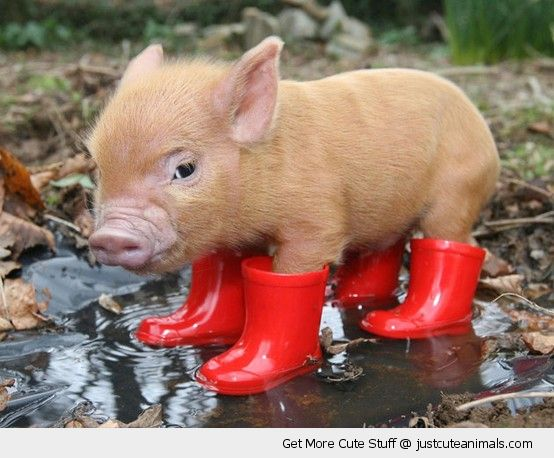

In [44]:
display(Image(filename='BabyPig.jpg',width=512,height=512))

In [45]:
img_path = 'Babypig.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [46]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02395406', 'hog', 0.75279915), ('n02396427', 'wild_boar', 0.2095204), ('n02454379', 'armadillo', 0.008546177)]


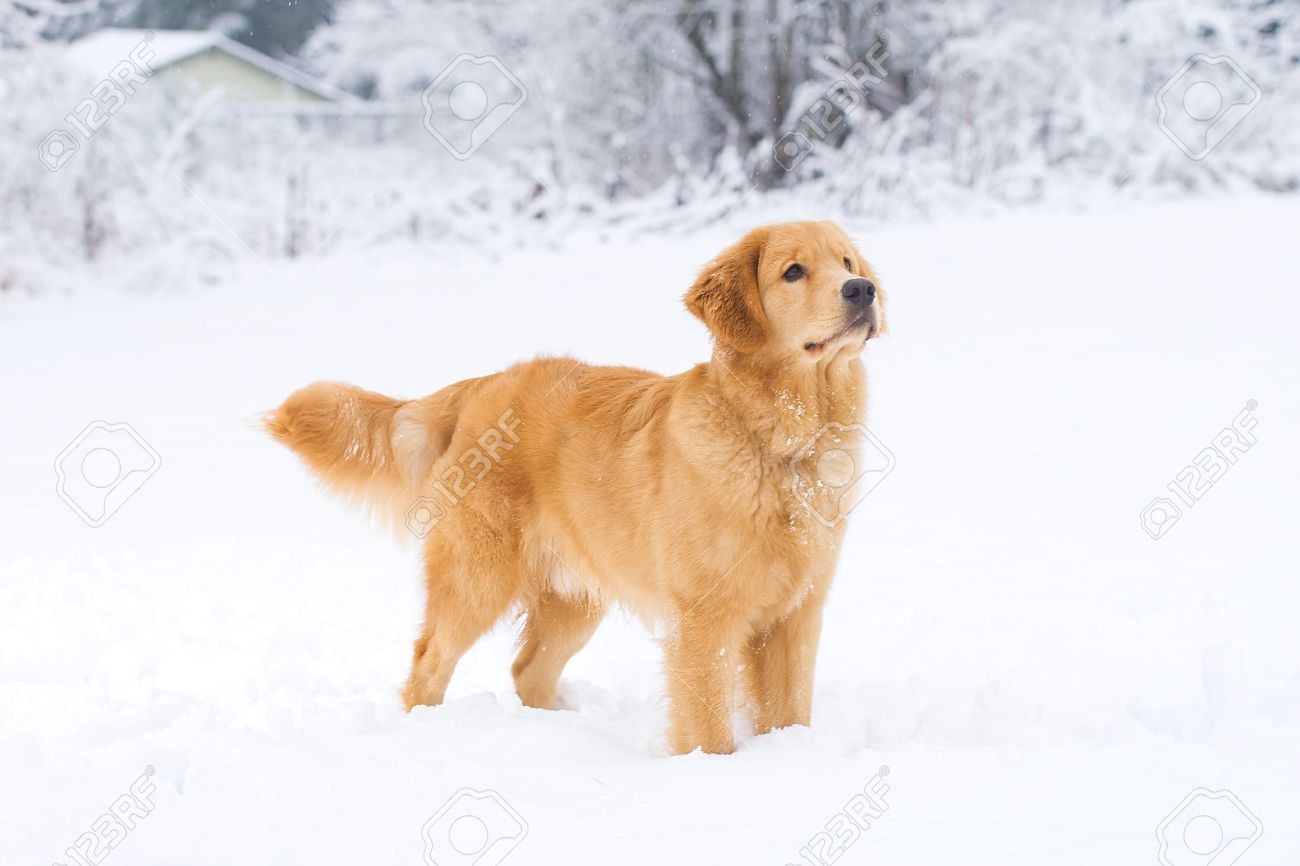

In [47]:
display(Image(filename='dog-in-the-snow.jpg',width=512,height=512))

In [48]:
img_path = 'dog-in-the-snow.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [49]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02099601', 'golden_retriever', 0.6468819), ('n02088466', 'bloodhound', 0.06814796), ('n02111129', 'Leonberg', 0.041091558)]


#### Final Example

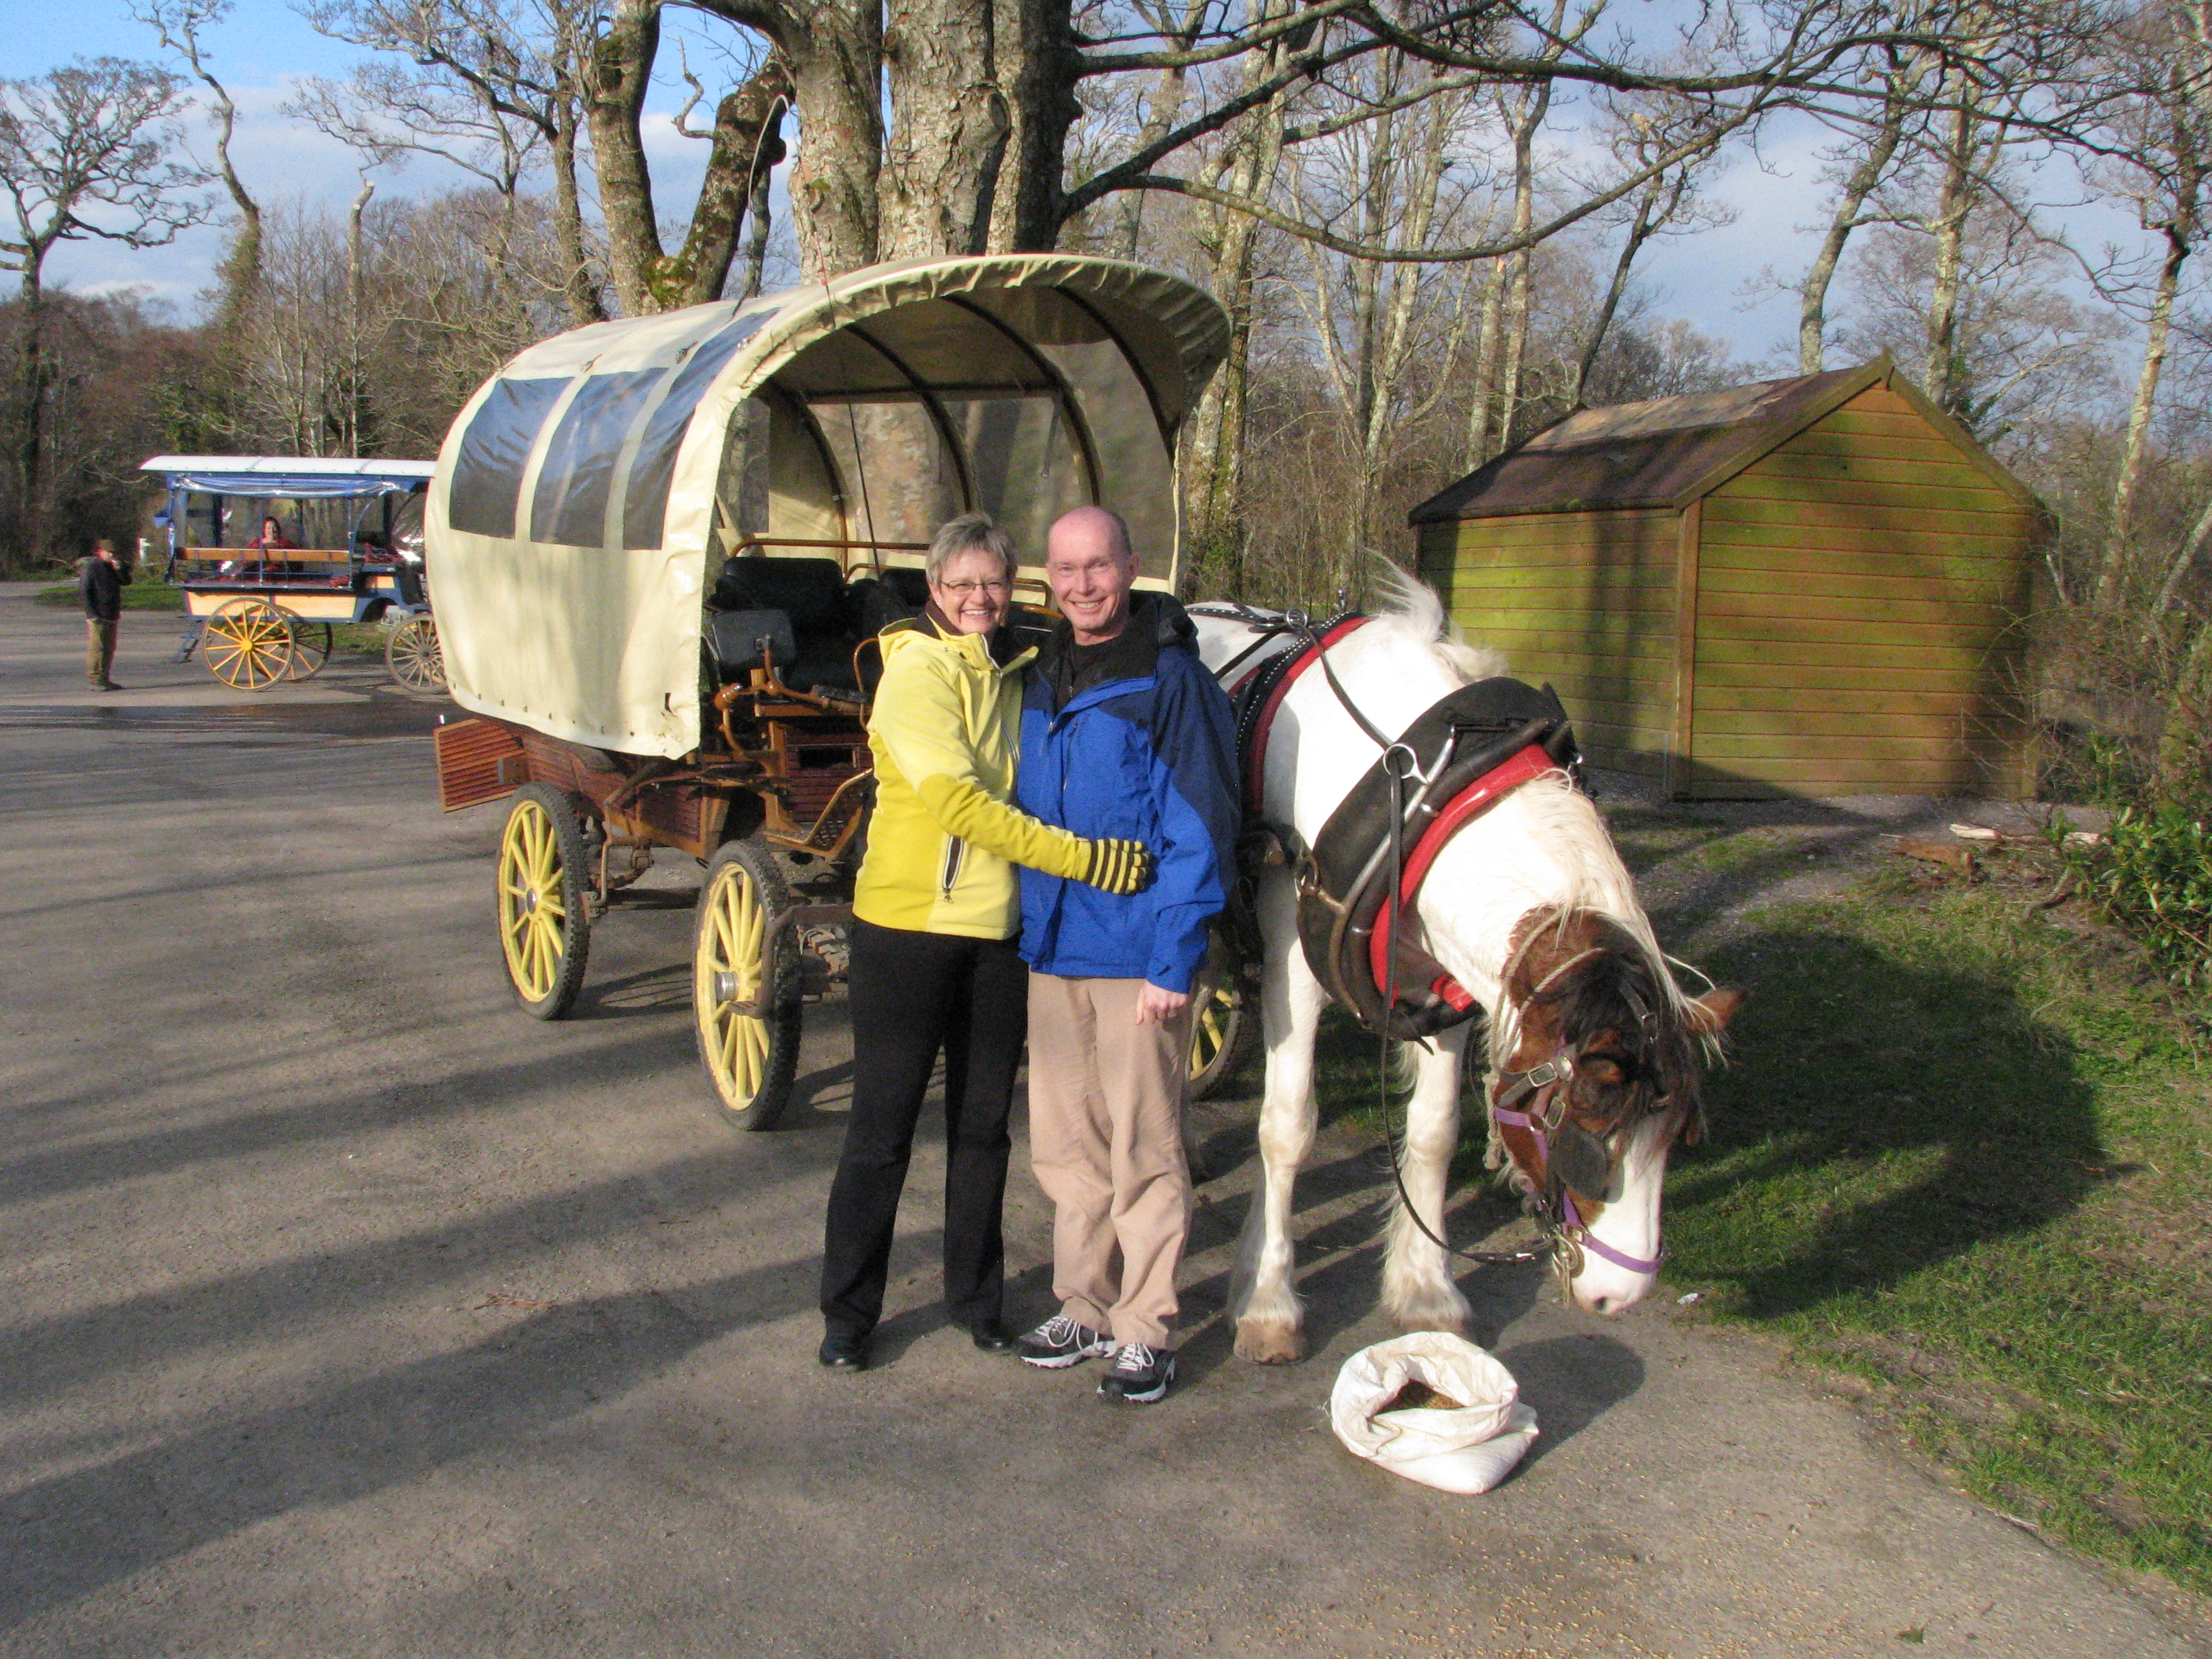

In [50]:
display(Image(filename='Ireland.jpg',width=512,height=512))

In [51]:
img_path = 'Ireland.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [52]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03404251', 'fur_coat', 0.23988242), ('n02102040', 'English_springer', 0.1444201), ('n03538406', 'horse_cart', 0.105091214)]


#### Other Models  

Other deep learning models that have had success are:

1) [LSTM](https://github.com/jisungk/deepjazz)  
2) Auto-encoders  
3) [Yolo](https://sandipanweb.wordpress.com/2018/03/11/autonomous-driving-car-detection-with-yolo-in-python/)

In [54]:
import IPython

I generated this jazz composition using a simple LSTM in keras.

In [57]:
IPython.display.Audio('./my_music.mp3')

### No Free Lunch Theorem  

Remember the no free lunch theorem that there is no universal best algorithm. So don't just apply a neural network to every problem.

## 5. Resources

Here are some resources to learn more about neural networks:

1) [Hands-On Machine Learning with Scikit-Learn & TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_3?crid=KFUTWT6TCHA1&keywords=hands+on+machine+learning+with+scikit-learn+and+tensorflow&qid=1571373216&sprefix=hands+on+m%2Caps%2C442&sr=8-3)  
2) [Fast.ai](https://www.fast.ai/)  
3) [Data Camp](https://www.datacamp.com/courses/deep-learning-with-keras-in-python)  
4) [Deep Learning ai](https://www.deeplearning.ai/)  
5) [Coursera](https://www.coursera.org/specializations/deep-learning?utm_source=gg&utm_medium=sem&utm_content=07-StanfordML-US&campaignid=685340575&adgroupid=52515609594&device=c&keyword=machine%20learning%20mooc&matchtype=b&network=g&devicemodel=&adpostion=1t1&creativeid=243289762946&hide_mobile_promo&gclid=Cj0KCQjwoqDtBRD-ARIsAL4pviD0dnLE1FoM9k6m64-4yTL3e0OaFn5EiYozj4yK6QMXBy5w9gh2T4EaAsonEALw_wcB)


### Backup Code  

This is some backup code to generate concentric circles of data. We could use this to create three or more classes of circles.

In [58]:
theta = np.array([2*math.pi*random.random() for _ in range(100)])
# Annulus between 4 and 3 4^2-3^2
radius = np.array([math.sqrt(7*random.random()+9) for _ in range(100)])

In [59]:
x=radius*np.cos(theta)
y=radius*np.sin(theta)

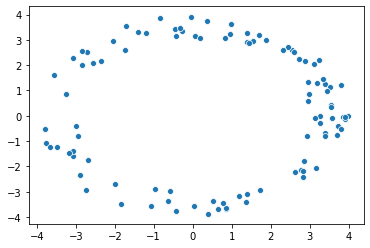

In [60]:
sns.scatterplot(x,y)

In [61]:
df1={'x':x,'y':y,'Result':np.repeat(1,100)}

In [62]:
d1=pd.DataFrame(df1)

In [63]:
d1.head()

x         y  Result
0  1.376214 -3.396241       1
1  0.061973  3.171936       1
2  1.704953  3.181950       1
3 -2.949333 -0.794386       1
4 -3.239780  0.872977       1

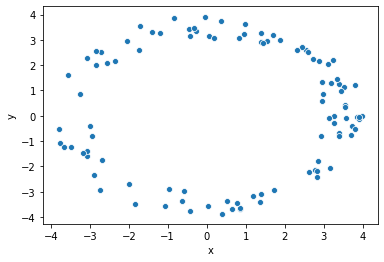

In [64]:
sns.scatterplot('x','y',data=d1)

In [65]:
theta = np.array([2*math.pi*random.random() for _ in range(100)])
# Annulus between 1 and 2 2^2-1^2
radius = np.array([math.sqrt(3*random.random()+1) for _ in range(100)])

In [66]:
x=radius*np.cos(theta)
y=radius*np.sin(theta)

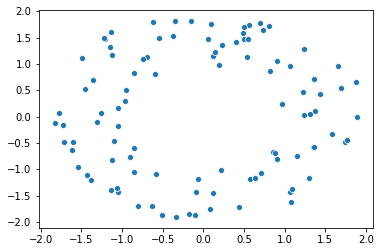

In [67]:
sns.scatterplot(x,y)

In [68]:
df={'x':x,'y':y,'Result':np.repeat(0,100)}

In [69]:
d2=pd.DataFrame(df)

In [70]:
d2.head()

x         y  Result
0  1.345673 -0.577792       0
1  0.497263  1.478345       0
2 -0.150838  1.812206       0
3  0.187432  0.983869       0
4  1.743196 -0.475565       0

In [71]:
d=pd.concat([d1,d2],ignore_index=True)

In [72]:
d=d.reset_index()

In [73]:
d1.head()

x         y  Result
0  1.376214 -3.396241       1
1  0.061973  3.171936       1
2  1.704953  3.181950       1
3 -2.949333 -0.794386       1
4 -3.239780  0.872977       1

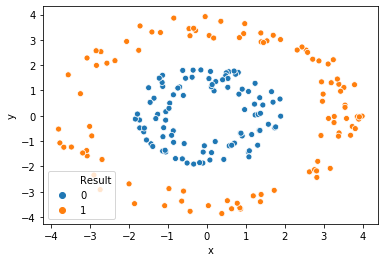

In [74]:
sns.scatterplot('x','y',hue='Result',data=d)

In [75]:
d.describe()

index           x           y      Result
count  200.000000  200.000000  200.000000  200.000000
mean    99.500000    0.332054    0.164351    0.500000
std     57.879185    1.937514    1.922090    0.501255
min      0.000000   -3.800832   -3.861713    0.000000
25%     49.750000   -1.070247   -1.185853    0.000000
50%     99.500000    0.374058    0.058241    0.500000
75%    149.250000    1.477097    1.496984    1.000000
max    199.000000    3.985259    3.918371    1.000000

In [76]:
d.describe()

index           x           y      Result
count  200.000000  200.000000  200.000000  200.000000
mean    99.500000    0.332054    0.164351    0.500000
std     57.879185    1.937514    1.922090    0.501255
min      0.000000   -3.800832   -3.861713    0.000000
25%     49.750000   -1.070247   -1.185853    0.000000
50%     99.500000    0.374058    0.058241    0.500000
75%    149.250000    1.477097    1.496984    1.000000
max    199.000000    3.985259    3.918371    1.000000

In [77]:
d.shape

(200, 4)

In [78]:
d.head()

index         x         y  Result
0      0  1.376214 -3.396241       1
1      1  0.061973  3.171936       1
2      2  1.704953  3.181950       1
3      3 -2.949333 -0.794386       1
4      4 -3.239780  0.872977       1